In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/investment-management/investment_management.csv


## Regression model to predict the Sales of Financial Assets

### 1. Introduction and Data Description

##### Case Study: Sales of Financial Assets
---

The dataset used is from an <b>Investment Management Firm</b>. The data consists of 2013 sales data for 1559 financial products across 10 of their branch offices in different cities</b>. The specific attributes of each financial product and office have been defined. Here are the specific columns in the dataset provided:

- Asset_Identifier: Unique product ID
- Asset_Popularity_With_Funds: Index which measures popularity of asset amongst other mutual funds and asset management companies
- Asset_Risk_Type: Whether the product is high risk or low risk (0: Low Risk, 1: High Risk)
- Asset_Marketing_Proportion_Index: The % of marketing budget spent on marketing this particular product versus other products
- Asset_Type: The category to which the product belongs
- Asset_Price: Asset Price (list price) of the product
- Office_Identifier: Unique store ID
- Office_Establishment_Year: The year in which store was established
- Office_Scale: The size of the store in terms of ground area covered
- Office_Location_Type: The type of city in which the store is located
- Office_Type: Whether the outlet is a small scale office or a larger scale one
- <b>Asset_Office_Sales</b>: Sales of the product in the particular office. This is the <b>outcome variable to be predicted</b>.
- Office_Year: Number of years which the office has been established.
- Asset: The broader category which the item belongs to (ETF, Bonds or Private Equity)



### 2. Import libraries, read data , Descriptive statistics

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Read data from csv into pandas dataframe
asset_sales_df = pd.read_csv('investment_management.csv')
asset_sales_df.head()

Asset_Identifier  Asset_Popularity_With_Funds  Asset_Risk_Type  \
0            FDA15                         9.30                0   
1            DRC01                         5.92                1   
2            FDN15                        17.50                0   
3            FDX07                        19.20                1   
4            NCD19                         8.93                0   

   Asset_Marketing_Proportion_Index  Asset_Type  Asset_Price  \
0                          0.016047           4     249.8092   
1                          0.019278          14      48.2692   
2                          0.016760          10     141.6180   
3                          0.022911           6     182.0950   
4                          0.016164           9      53.8614   

  Office_Identifier  Office_Establishment_Year  Office_Scale  \
0            OFF049                       1999             1   
1            OFF018                       2009             1   
2            OFF049                       1999             1   
3            OFF010                       1998             2   
4            OFF013                       1987             0   

   Office_Location_Type  Office_Type  Asset_Office_Sales  Office_Year  \
0                     0            1           3735.1380           14   
1                     2            2            443.4228            4   
2                     0            1           2097.2700           14   
3                     2            0            732.3800           15   
4                     2            1            994.7052           26   

            Asset  
0           Bonds  
1             ETF  
2           Bonds  
3           Bonds  
4  Private Equity

In [4]:
asset_sales_df.shape

(8523, 14)

In [5]:
asset_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Asset_Identifier                  8523 non-null   object 
 1   Asset_Popularity_With_Funds       8523 non-null   float64
 2   Asset_Risk_Type                   8523 non-null   int64  
 3   Asset_Marketing_Proportion_Index  8523 non-null   float64
 4   Asset_Type                        8523 non-null   int64  
 5   Asset_Price                       8523 non-null   float64
 6   Office_Identifier                 8523 non-null   object 
 7   Office_Establishment_Year         8523 non-null   int64  
 8   Office_Scale                      8523 non-null   int64  
 9   Office_Location_Type              8523 non-null   int64  
 10  Office_Type                       8523 non-null   int64  
 11  Asset_Office_Sales                8523 non-null   float64
 12  Office

In [6]:
asset_sales_df.describe().T

count         mean          std  \
Asset_Popularity_With_Funds       8523.0    12.875418     4.645016   
Asset_Risk_Type                   8523.0     0.352693     0.477836   
Asset_Marketing_Proportion_Index  8523.0     0.070749     0.050313   
Asset_Type                        8523.0     7.226681     4.209990   
Asset_Price                       8523.0   140.992782    62.275067   
Office_Establishment_Year         8523.0  1997.831867     8.371760   
Office_Scale                      8523.0     1.453596     0.683084   
Office_Location_Type              8523.0     1.112871     0.812757   
Office_Type                       8523.0     1.201220     0.796459   
Asset_Office_Sales                8523.0  2181.288914  1706.499616   
Office_Year                       8523.0    15.168133     8.371760   

                                          min          25%        50%  \
Asset_Popularity_With_Funds          4.555000     8.785000    12.6500   
Asset_Risk_Type                      0.000000     0.000000     0.0000   
Asset_Marketing_Proportion_Index     0.003575     0.031395     0.0581   
Asset_Type                           0.000000     4.000000     6.0000   
Asset_Price                         31.290000    93.826500   143.0128   
Office_Establishment_Year         1985.000000  1987.000000  1999.0000   
Office_Scale                         0.000000     1.000000     2.0000   
Office_Location_Type                 0.000000     0.000000     1.0000   
Office_Type                          0.000000     1.000000     1.0000   
Asset_Office_Sales                  33.290000   834.247400  1794.3310   
Office_Year                          4.000000     9.000000    14.0000   

                                          75%           max  
Asset_Popularity_With_Funds         16.850000     21.350000  
Asset_Risk_Type                      1.000000      1.000000  
Asset_Marketing_Proportion_Index     0.098867      0.328391  
Asset_Type                          10.000000     15.000000  
Asset_Price                        185.643700    266.888400  
Office_Establishment_Year         2004.000000   2009.000000  
Office_Scale                         2.000000      2.000000  
Office_Location_Type                 2.000000      2.000000  
Office_Type                          1.000000      3.000000  
Asset_Office_Sales                3101.296400  13086.964800  
Office_Year                         26.000000     28.000000

In [7]:
# Look at number of unique values each column has
asset_sales_df.nunique()

Asset_Identifier                    1559
Asset_Popularity_With_Funds          419
Asset_Risk_Type                        2
Asset_Marketing_Proportion_Index    8322
Asset_Type                            16
Asset_Price                         5938
Office_Identifier                     10
Office_Establishment_Year              9
Office_Scale                           3
Office_Location_Type                   3
Office_Type                            4
Asset_Office_Sales                  3493
Office_Year                            9
Asset                                  3
dtype: int64

In [8]:
# Checking for null values
asset_sales_df.isnull().sum()

Asset_Identifier                    0
Asset_Popularity_With_Funds         0
Asset_Risk_Type                     0
Asset_Marketing_Proportion_Index    0
Asset_Type                          0
Asset_Price                         0
Office_Identifier                   0
Office_Establishment_Year           0
Office_Scale                        0
Office_Location_Type                0
Office_Type                         0
Asset_Office_Sales                  0
Office_Year                         0
Asset                               0
dtype: int64

### 3. Exploratory Data Analysis: 

In [9]:
# Correlation heatmap
fig  = px.imshow(asset_sales_df.corr())
fig.show()

array([[<AxesSubplot:title={'center':'Asset_Popularity_With_Funds'}>,
        <AxesSubplot:title={'center':'Asset_Risk_Type'}>,
        <AxesSubplot:title={'center':'Asset_Marketing_Proportion_Index'}>],
       [<AxesSubplot:title={'center':'Asset_Type'}>,
        <AxesSubplot:title={'center':'Asset_Price'}>,
        <AxesSubplot:title={'center':'Office_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Office_Scale'}>,
        <AxesSubplot:title={'center':'Office_Location_Type'}>,
        <AxesSubplot:title={'center':'Office_Type'}>],
       [<AxesSubplot:title={'center':'Asset_Office_Sales'}>,
        <AxesSubplot:title={'center':'Office_Year'}>, <AxesSubplot:>]],
      dtype=object)

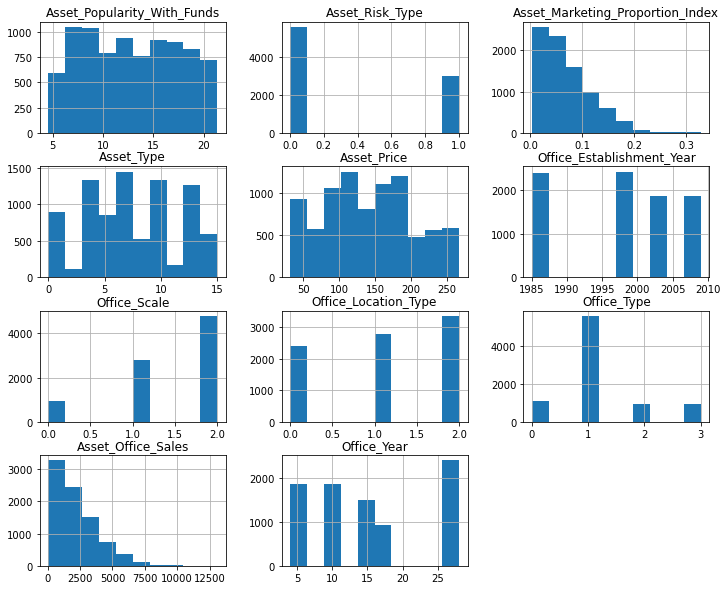

In [10]:
# Distribution of various column values
asset_sales_df.hist(figsize=(12,10))

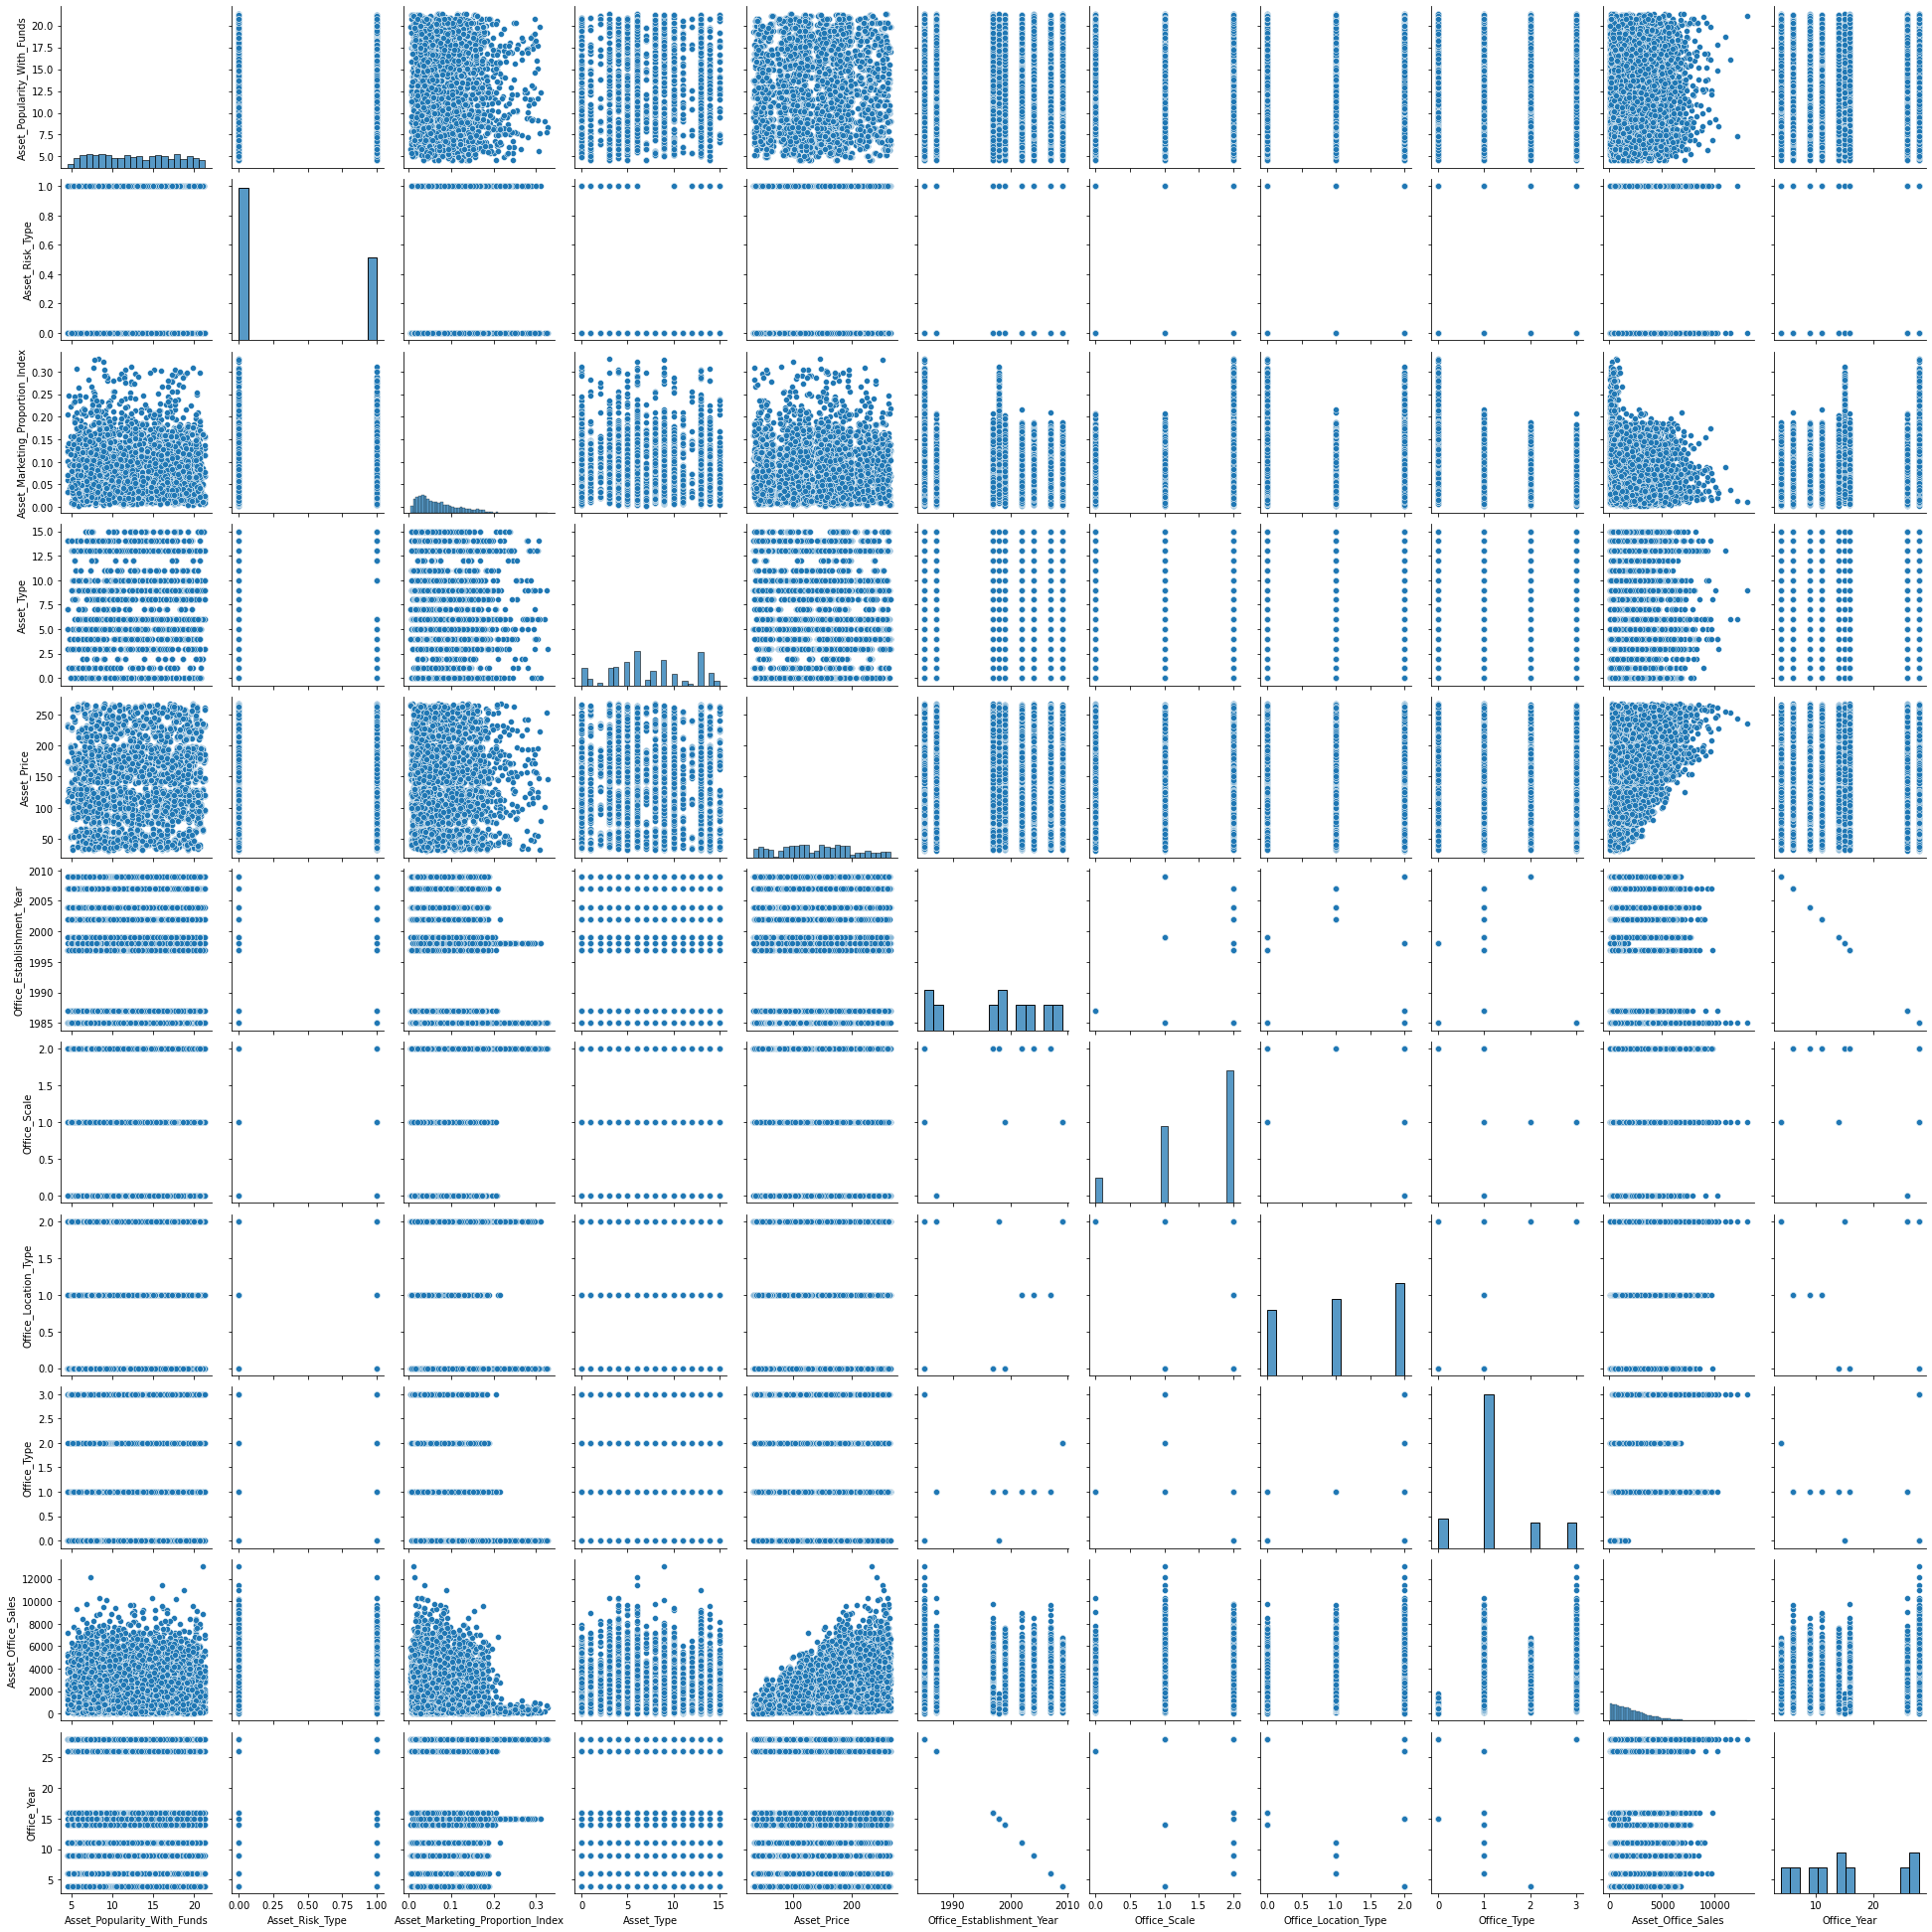

In [11]:
sns.pairplot(asset_sales_df)

In [36]:
fig = px.scatter(asset_sales_df, x="Asset_Price", y="Asset_Office_Sales", color="Office_Type",
                 trendline="ols", title="Asset Office Sales vs Asset Price")

fig.show()

'Asset_Office_Sales' has good correlation with 'Asset_Price'

In [13]:
fig=px.pie(asset_sales_df, values = 'Asset_Office_Sales', names = 'Asset', title = 'Asset Office Sales by Assets')
fig.show()

Most "Asset_Office_Sales' coming from 'Asset'  - Bonds

In [14]:
fig=px.pie(asset_sales_df, values = 'Asset_Office_Sales', names = 'Office_Type', title = 'Asset Office Sales by Office type')
fig.show()

Most "Asset_Office_Sales" coming from the office of  'Office_Type' 1, followed by 3, 2 and then 0

In [15]:
fig = px.histogram(asset_sales_df, x='Office_Establishment_Year', y='Asset_Office_Sales', color = 'Office_Identifier')
fig.update_xaxes(nticks=30)
fig.show()

Office 'OFFO27' is one of the oldest offices with  highest 'Asset_Office_Sales'  
'Offices, 'OFFO35' and 'OFFO17' are relatively recent , established in 2004 and 2007 respectively wuth  pretty good 'Asset_Office_Sales'.

'Asset_Office_Sales' from office 'OFFO19' are the lowest, it's one of the oldest office, establised in 1985.
'OFFO10' established in 1998 has the next lowest 'Asset_Office_Sales'

In [16]:
fig = px.histogram(asset_sales_df, x='Asset', y='Asset_Office_Sales', color = 'Asset_Type')
fig.update_xaxes(nticks=3)
fig.show()

Major 'Asset_Office_Sales' are from  'Asset' - 'Bonds'

'Asset_Type' - 5, 6, 13 (Bonds), 9 (Private Equity) are the Highest contributors to 'Asset_Office_Sales'

### 4. Feature Engineering

In [17]:
asset_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Asset_Identifier                  8523 non-null   object 
 1   Asset_Popularity_With_Funds       8523 non-null   float64
 2   Asset_Risk_Type                   8523 non-null   int64  
 3   Asset_Marketing_Proportion_Index  8523 non-null   float64
 4   Asset_Type                        8523 non-null   int64  
 5   Asset_Price                       8523 non-null   float64
 6   Office_Identifier                 8523 non-null   object 
 7   Office_Establishment_Year         8523 non-null   int64  
 8   Office_Scale                      8523 non-null   int64  
 9   Office_Location_Type              8523 non-null   int64  
 10  Office_Type                       8523 non-null   int64  
 11  Asset_Office_Sales                8523 non-null   float64
 12  Office

In [18]:
## Transform columns 'Asset' and 'Office_Identifier' into numerical form
asset_sales_df['Asset'] = asset_sales_df['Asset'].map({'ETF':0, 'Bonds': 1, 'Private Equity': 2})
asset_sales_df['Office_Identifier'] = asset_sales_df['Office_Identifier'].map({'OFF010':0, 'OFF013': 1, 'OFF017': 2, 'OFF018' :3, 
                                                                               'OFF019': 4, 'OFF027': 5, 'OFF035': 6, 'OFF045': 7, 'OFF046': 8, 'OFF049': 9})
asset_sales_df.head()

Asset_Identifier  Asset_Popularity_With_Funds  Asset_Risk_Type  \
0            FDA15                         9.30                0   
1            DRC01                         5.92                1   
2            FDN15                        17.50                0   
3            FDX07                        19.20                1   
4            NCD19                         8.93                0   

   Asset_Marketing_Proportion_Index  Asset_Type  Asset_Price  \
0                          0.016047           4     249.8092   
1                          0.019278          14      48.2692   
2                          0.016760          10     141.6180   
3                          0.022911           6     182.0950   
4                          0.016164           9      53.8614   

   Office_Identifier  Office_Establishment_Year  Office_Scale  \
0                  9                       1999             1   
1                  3                       2009             1   
2                  9                       1999             1   
3                  0                       1998             2   
4                  1                       1987             0   

   Office_Location_Type  Office_Type  Asset_Office_Sales  Office_Year  Asset  
0                     0            1           3735.1380           14      1  
1                     2            2            443.4228            4      0  
2                     0            1           2097.2700           14      1  
3                     2            0            732.3800           15      1  
4                     2            1            994.7052           26      2

In [19]:
# Dropping 'Asset_Identifier' column
asset_sales_df.drop('Asset_Identifier', axis = 1, inplace = True)

In [20]:
asset_sales_df.head()

Asset_Popularity_With_Funds  Asset_Risk_Type  \
0                         9.30                0   
1                         5.92                1   
2                        17.50                0   
3                        19.20                1   
4                         8.93                0   

   Asset_Marketing_Proportion_Index  Asset_Type  Asset_Price  \
0                          0.016047           4     249.8092   
1                          0.019278          14      48.2692   
2                          0.016760          10     141.6180   
3                          0.022911           6     182.0950   
4                          0.016164           9      53.8614   

   Office_Identifier  Office_Establishment_Year  Office_Scale  \
0                  9                       1999             1   
1                  3                       2009             1   
2                  9                       1999             1   
3                  0                       1998             2   
4                  1                       1987             0   

   Office_Location_Type  Office_Type  Asset_Office_Sales  Office_Year  Asset  
0                     0            1           3735.1380           14      1  
1                     2            2            443.4228            4      0  
2                     0            1           2097.2700           14      1  
3                     2            0            732.3800           15      1  
4                     2            1            994.7052           26      2

### 6. Model Building

#### Decision tree regressor with train-test split

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error
import math

#features=['Office_Type', 'Office_Year', 'Asset', 'Asset_Price', 'Asset_Popularity_With_Funds','Asset_Risk_Type','Asset_Marketing_Proportion_Index','Office_Location_Type']

features=['Office_Type', 'Office_Year', 'Asset', 'Asset_Price', 'Asset_Popularity_With_Funds','Asset_Risk_Type']

X = asset_sales_df[features]
y = asset_sales_df['Asset_Office_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

regressor = DecisionTreeRegressor(random_state=3, max_depth=6)
decision_tree_model = regressor.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print("%.4f" % RMSE)

1082.1348
